In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 유동인구 데이터 불러오기

f = pd.read_csv("fpopl.csv")
df = pd.DataFrame(f)
df.shape

(47546443, 6)

In [3]:
# 행정동 데이터 불러오기

f2 = pd.read_csv("adstrd_master.csv")
df2 = pd.DataFrame(f2)

df2.shape

(3493, 4)

In [4]:
# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people = pd.merge(df,df2,on="adstrd_code",how="left")
move_people.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15,반포1동,서울특별시,서초구
1,20200101,0,M,age_00,11590620,6,사당1동,서울특별시,동작구
2,20200101,0,M,age_00,11560710,4,대림2동,서울특별시,영등포구
3,20200101,0,M,age_00,11470680,12,신정7동,서울특별시,양천구
4,20200101,0,M,age_00,11350665,6,상계3.4동,서울특별시,노원구


In [5]:
print(move_people.shape)
print("\n\n")
# 47546443 행
print(move_people.loc[:,"base_ymd"])

(47546443, 9)



0           20200101
1           20200101
2           20200101
3           20200101
4           20200101
              ...   
47546438    20200616
47546439    20200616
47546440    20200616
47546441    20200616
47546442    20200616
Name: base_ymd, Length: 47546443, dtype: int64


In [6]:
del move_people['brtc_nm']

# brtc_nm은 시도 명이다.
# 현 DATASET은 서울시 내 행정구역 데이터이기 때문에, brtc_nm 칼럼 삭제

In [7]:
move_people.shape

(47546443, 8)

In [8]:
move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

In [9]:
grouped = move_people.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
# 행정동별, 행정구별, 시간대별, 날짜별 _유동인구
grouped

,년월일,유동인구
0,20200101,45208028
1,20200102,55749874
2,20200103,59151121
3,20200104,54474173
4,20200105,46903976
...,...,...
163,20200612,60942009
164,20200613,54872785
165,20200614,46161661
166,20200615,58717583


In [10]:
grouped['유동인구']

0      45208028
1      55749874
2      59151121
3      54474173
4      46903976
         ...   
163    60942009
164    54872785
165    46161661
166    58717583
167    58826353
Name: 유동인구, Length: 168, dtype: int64

In [11]:
!pip install scikit-learn

In [12]:
from sklearn.preprocessing import scale

In [13]:
grouped['유동인구_표준화'] = scale(grouped['유동인구'])

In [14]:
grouped_avg = grouped.mean()
grouped_avg[1]

52839332.98214286

In [15]:
grouped['유동인구_평균대비_증감률'] = (grouped['유동인구']-grouped_avg[1])/grouped_avg[1]*100
seoul = grouped

In [16]:
seoul

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률
0,20200101,45208028,-1.332378,-14.442470
1,20200102,55749874,0.508162,5.508285
2,20200103,59151121,1.101998,11.945245
3,20200104,54474173,0.285433,3.093983
4,20200105,46903976,-1.036276,-11.232839
...,...,...,...,...
163,20200612,60942009,1.414676,15.334554
164,20200613,54872785,0.355028,3.848368
165,20200614,46161661,-1.165879,-12.637692
166,20200615,58717583,1.026305,11.124762


In [17]:
path = './'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo.csv')
#p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')
floating = pd.read_csv(path+'SeoulFloating.csv')
policy = pd.read_csv(path+'Policy.csv')

In [18]:
# 코로나 데이터 불러오기
# 전국코로나 데이터
# 2월~4월: 대구코로나 데이터
# 4월부터 지역 코로나 데이터

In [19]:
len(t_provin)

2771

In [20]:
t_provin_Seoul = t_provin.groupby(by=['date','province']).sum()['confirmed'].reset_index()
t_provin_Seoul = t_provin_Seoul.loc[t_provin_Seoul['province']=='Seoul']
t_provin_Seoul

,date,province,confirmed
15,2020-01-20,Seoul,0
32,2020-01-21,Seoul,0
49,2020-01-22,Seoul,0
66,2020-01-23,Seoul,0
83,2020-01-24,Seoul,0
...,...,...,...
2701,2020-06-26,Seoul,1267
2718,2020-06-27,Seoul,1284
2735,2020-06-28,Seoul,1298
2752,2020-06-29,Seoul,1305


In [21]:
t_provin_Seoul = t_provin_Seoul.rename({'confirmed':'총확진자'},axis = 'columns')

In [22]:
t_provin_Seoul = t_provin_Seoul.drop('province',axis=1)

In [23]:
t_provin_Seoul['총확진자'].iloc[3]

0

In [24]:
t_provin_Seoul['일일확진자'] = t_provin_Seoul['총확진자']
t_provin_Seoul

,date,총확진자,일일확진자
15,2020-01-20,0,0
32,2020-01-21,0,0
49,2020-01-22,0,0
66,2020-01-23,0,0
83,2020-01-24,0,0
...,...,...,...
2701,2020-06-26,1267,1267
2718,2020-06-27,1284,1284
2735,2020-06-28,1298,1298
2752,2020-06-29,1305,1305


In [25]:
my_list = np.array(t_provin_Seoul['총확진자'])

In [26]:
new_list = np.ones((len(my_list)),dtype = np.int64)

for i in range(len(my_list)):
    if i == 0:
        new_list[i]=my_list[i]
    else:
        new_list[i] = my_list[i]-my_list[i-1]
new_list

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  1,  0,  1,  0,  0,  0,
        5,  1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  2,  5,  3,
        1,  4,  6,  8,  7,  6, 15, 10,  4,  7,  1,  4,  2,  3, 12, 10, 11,
       52, 19, 13, 13,  9,  6, 12,  5, 12, 17, 15, 10,  6,  4, 13, 13, 12,
       18, 20, 16, 24, 24, 14, 18, 22, 24, 11,  4, 11, 12,  5,  4,  3,  8,
        2,  5,  2,  2,  1,  2,  0,  2,  2,  0,  0,  1,  0,  0,  4,  0,  0,
        1,  1,  2,  0,  0,  0,  0,  0, 12, 14, 20, 12, 12,  4, 14,  5,  5,
        1,  6, 10,  4,  2,  4,  6,  6,  9, 19, 24, 20,  9,  6,  1, 14, 19,
       14, 15, 23, 27, 22, 19, 12, 21, 25, 28, 12,  7, 12, 13, 25, 18, 14,
       17,  5,  6, 11,  9, 17, 17, 14,  7,  7], dtype=int64)

In [27]:
t_provin_Seoul['일일확진자'] = new_list
t_provin_Seoul = t_provin_Seoul.rename({'date':'년월일'},axis='columns').reset_index()
t_provin_Seoul = t_provin_Seoul.drop('index',axis=1)
t_provin_Seoul

,년월일,총확진자,일일확진자
0,2020-01-20,0,0
1,2020-01-21,0,0
2,2020-01-22,0,0
3,2020-01-23,0,0
4,2020-01-24,0,0
...,...,...,...
158,2020-06-26,1267,17
159,2020-06-27,1284,17
160,2020-06-28,1298,14
161,2020-06-29,1305,7


In [28]:
p_info_seoul = p_info.loc[p_info['province']=='Seoul']
p_info_seoul

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1000001308,NaN,NaN,Korea,Seoul,Mapo-gu,Richway,1000001290,NaN,NaN,2020-06-29,NaN,NaN,isolated
1308,1000001309,NaN,NaN,Korea,Seoul,Mapo-gu,Richway,1000001290,NaN,NaN,2020-06-29,NaN,NaN,isolated
1309,1000001310,NaN,NaN,Korea,Seoul,Geumcheon-gu,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
1310,1000001311,NaN,NaN,Korea,Seoul,etc,NaN,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated


In [29]:
p_info_seoul_oversea = p_info_seoul.loc[p_info_seoul['infection_case']=='overseas inflow']
p_info_seoul_oversea = p_info_seoul_oversea.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_oversea = p_info_seoul_oversea.rename({'confirmed_date':'년월일','province':'해외유입확진자수'},axis = 'columns')
p_info_seoul_oversea 

,년월일,해외유입확진자수
0,2020-01-23,1
1,2020-01-30,2
2,2020-02-02,1
3,2020-02-05,1
4,2020-02-06,1
...,...,...
87,2020-06-25,1
88,2020-06-26,2
89,2020-06-27,1
90,2020-06-28,1


In [30]:
print(p_info_seoul['infection_case'].describe(),
      '\n\n\n',
     p_info_seoul['infection_case'].value_counts())

count                1227
unique                 34
top       overseas inflow
freq                  306
Name: infection_case, dtype: object 


 overseas inflow                                  306
contact with patient                             171
Itaewon Clubs                                    139
Richway                                          119
etc                                               99
Guro-gu Call Center                               95
Yangcheon Table Tennis Club                       43
Day Care Center                                   43
SMR Newly Planted Churches Group                  36
Coupang Logistics Center                          25
Wangsung Church                                   24
Dongan Church                                     17
Eunpyeong St. Mary's Hospital                     14
Seongdong-gu APT                                  13
KB Life Insurance                                 13
Samsung Medical Center                             7
Korea Ca

In [31]:
p_info_seoul_not_group = p_info_seoul[p_info_seoul['infection_case'].isin(['etc','contact with patient',np.nan])]
p_info_seoul_not_group = p_info_seoul_not_group.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_not_group = p_info_seoul_not_group.rename({'confirmed_date':'년월일','province':'비그룹감염확진자수'},axis = 'columns')
p_info_seoul_not_group 

,년월일,비그룹감염확진자수
0,2020-01-30,1
1,2020-01-31,3
2,2020-02-05,1
3,2020-02-16,2
4,2020-02-19,1
...,...,...
93,2020-06-25,9
94,2020-06-26,3
95,2020-06-27,4
96,2020-06-28,3


In [32]:
p_info_seoul_group = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_seoul_group = p_info_seoul_group.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_group = p_info_seoul_group.rename({'confirmed_date':'년월일','province':'그룹감염확진자수'},axis='columns')
p_info_seoul_group

,년월일,그룹감염확진자수
0,2020-02-19,1
1,2020-02-20,1
2,2020-02-21,2
3,2020-02-22,1
4,2020-02-23,2
...,...,...
73,2020-06-25,7
74,2020-06-26,12
75,2020-06-27,9
76,2020-06-28,3


In [33]:
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [34]:
weather_seoul =  weather.loc[weather['province']=='Seoul']
weather_seoul

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
16,10000,Seoul,2016-01-02,5.7,1.0,9.5,0.0,4.5,320.0,76.9
32,10000,Seoul,2016-01-03,6.5,5.1,9.4,0.0,4.0,320.0,80.6
48,10000,Seoul,2016-01-04,2.0,-2.5,5.3,0.0,5.1,320.0,54.4
64,10000,Seoul,2016-01-05,-2.7,-4.8,1.5,0.0,4.6,20.0,39.4
...,...,...,...,...,...,...,...,...,...,...
26191,10000,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,180.0,91.0
26207,10000,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,230.0,82.1
26223,10000,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,250.0,70.4
26239,10000,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,270.0,70.5


In [35]:
p_info_DaeGyeong = p_info.loc[p_info['province'].isin(['Gyeongsangbuk-do','Gyeongsangnam-do','Daegu','busan'])]
p_info_DaeGyeong = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_DaeGyeong = p_info_DaeGyeong.groupby(by=['confirmed_date']).count()['patient_id'].reset_index()
p_info_DaeGyeong.head

<bound method NDFrame.head of    confirmed_date  patient_id
0      2020-02-19           1
1      2020-02-20           1
2      2020-02-21           2
3      2020-02-22           1
4      2020-02-23           2
..            ...         ...
73     2020-06-25           7
74     2020-06-26          12
75     2020-06-27           9
76     2020-06-28           3
77     2020-06-29           3

[78 rows x 2 columns]>

In [36]:
p_info_DaeGyeong = p_info.loc[p_info['province'].isin(['Gyeongsangbuk-do','Gyeongsangnam-do','Daegu','busan'])]
p_info_DaeGyeong = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_DaeGyeong.head(50)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
14,1000000015,male,70s,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,8,2020-02-11,2020-02-19,NaN,NaN,released
19,1000000020,female,70s,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,1000000015,NaN,NaN,2020-02-20,NaN,NaN,released
21,1000000022,male,30s,Korea,Seoul,Seodaemun-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,2020-02-21,NaN,NaN,released
22,1000000023,male,50s,Korea,Seoul,Seocho-gu,Shincheonji Church,NaN,NaN,NaN,2020-02-21,NaN,NaN,released
24,1000000025,male,60s,Korea,Seoul,Gangdong-gu,Eunpyeong St. Mary's Hospital,1000000022,NaN,NaN,2020-02-22,NaN,NaN,released
27,1000000028,female,70s,Korea,Seoul,Jongno-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,2020-02-23,2020-03-11,NaN,released
28,1000000029,female,20s,Korea,Seoul,Jongno-gu,Eunpyeong St. Mary's Hospital,1000000028,NaN,2020-02-11,2020-02-26,2020-03-11,NaN,released
29,1000000030,male,60s,China,Seoul,Gangdong-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,2020-02-23,NaN,NaN,released
35,1000000036,female,50s,Korea,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,2020-02-25,NaN,NaN,released
46,1000000047,male,20s,Korea,Seoul,Gangnam-gu,Shincheonji Church,NaN,NaN,NaN,2020-02-26,2020-03-11,NaN,released


In [37]:
p_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [38]:
t_provin_korea = t_provin.groupby(by=['date']).sum()['confirmed'].reset_index()
t_provin_korea_cum = t_provin_korea.rename({'date':'년월일','confirmed':'전국누적확진자'},axis='columns')
t_provin_korea_cum

,년월일,전국누적확진자
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2
...,...,...
158,2020-06-26,11923
159,2020-06-27,11963
160,2020-06-28,12009
161,2020-06-29,12046


In [39]:
p_info_korea = p_info.groupby(by=['confirmed_date']).count()['country'].reset_index()
p_info_korea = p_info_korea.rename({'confirmed_date':'년월일','country':'전국일일확진자'},axis='columns')
p_info_korea

,년월일,전국일일확진자
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,4
...,...,...
143,2020-06-26,40
144,2020-06-27,48
145,2020-06-28,38
146,2020-06-29,25


In [40]:
p_info_korea_group = p_info[~p_info['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
print(p_info_korea_group['infection_case'].value_counts())
p_info_korea_group = p_info_korea_group.groupby(by=['confirmed_date']).count()['country'].reset_index()
p_info_korea_group = p_info_korea_group.rename({'confirmed_date':'년월일','country':'그룹감염_전국'},axis='columns')
p_info_korea_group

Itaewon Clubs                                    162
Richway                                          128
Guro-gu Call Center                              112
Shincheonji Church                               107
Coupang Logistics Center                          80
Yangcheon Table Tennis Club                       44
Day Care Center                                   43
SMR Newly Planted Churches Group                  36
Onchun Church                                     33
Bonghwa Pureun Nursing Home                       31
gym facility in Cheonan                           30
Ministry of Oceans and Fisheries                  28
Wangsung Church                                   24
Cheongdo Daenam Hospital                          21
Dongan Church                                     17
Eunpyeong St. Mary's Hospital                     16
Gyeongsan Seorin Nursing Home                     15
Seongdong-gu APT                                  13
KB Life Insurance                             

,년월일,그룹감염_전국
0,2020-02-18,5
1,2020-02-19,13
2,2020-02-20,11
3,2020-02-21,14
4,2020-02-22,23
...,...,...
86,2020-06-25,7
87,2020-06-26,12
88,2020-06-27,9
89,2020-06-28,3


In [41]:
mylist= list(range(0,19))
groupTotal = seoul.drop(mylist)
groupTotal = groupTotal.reset_index()
groupTotal = groupTotal.drop("index", axis=1)
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률
0,20200120,58756245,1.033055,11.197931
1,20200121,60130173,1.272935,13.798130
2,20200122,60989618,1.422988,15.424655
3,20200123,59576464,1.176261,12.750220
4,20200124,43898360,-1.561037,-16.921056
...,...,...,...,...
144,20200612,60942009,1.414676,15.334554
145,20200613,54872785,0.355028,3.848368
146,20200614,46161661,-1.165879,-12.637692
147,20200615,58717583,1.026305,11.124762


In [42]:
t_provin_Seoul.tail(20)

,년월일,총확진자,일일확진자
143,2020-06-11,1048,21
144,2020-06-12,1073,25
145,2020-06-13,1101,28
146,2020-06-14,1113,12
147,2020-06-15,1120,7
148,2020-06-16,1132,12
149,2020-06-17,1145,13
150,2020-06-18,1170,25
151,2020-06-19,1188,18
152,2020-06-20,1202,14


In [43]:
mylist = list(range(149,163))
t_provin_Seoul = t_provin_Seoul.drop(mylist).reset_index()

In [44]:
t_provin_Seoul
# t_provin_Seoul은 이미 제거됨

,index,년월일,총확진자,일일확진자
0,0,2020-01-20,0,0
1,1,2020-01-21,0,0
2,2,2020-01-22,0,0
3,3,2020-01-23,0,0
4,4,2020-01-24,0,0
...,...,...,...,...
144,144,2020-06-12,1073,25
145,145,2020-06-13,1101,28
146,146,2020-06-14,1113,12
147,147,2020-06-15,1120,7


In [45]:
groupTotal = pd.concat([groupTotal,t_provin_Seoul.drop(['index','년월일'],axis=1)],axis=1)
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자
0,20200120,58756245,1.033055,11.197931,0,0
1,20200121,60130173,1.272935,13.798130,0,0
2,20200122,60989618,1.422988,15.424655,0,0
3,20200123,59576464,1.176261,12.750220,0,0
4,20200124,43898360,-1.561037,-16.921056,0,0
...,...,...,...,...,...,...
144,20200612,60942009,1.414676,15.334554,1073,25
145,20200613,54872785,0.355028,3.848368,1101,28
146,20200614,46161661,-1.165879,-12.637692,1113,12
147,20200615,58717583,1.026305,11.124762,1120,7


In [46]:
corr = groupTotal.corr(method='pearson')
print(corr)

                    년월일      유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자
년월일            1.000000  0.214851  0.214851       0.214851  0.969898  0.389079
유동인구           0.214851  1.000000  1.000000       1.000000  0.247355 -0.011350
유동인구_표준화       0.214851  1.000000  1.000000       1.000000  0.247355 -0.011350
유동인구_평균대비_증감률  0.214851  1.000000  1.000000       1.000000  0.247355 -0.011350
총확진자           0.969898  0.247355  0.247355       0.247355  1.000000  0.375960
일일확진자          0.389079 -0.011350 -0.011350      -0.011350  0.375960  1.000000


In [52]:
mylist = list(range(0,1480))
weather_seoul.drop(mylist,inplace=True)
weather_seoul

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
1479,23663,10000,Seoul,2020-01-19,1.9,-0.4,5.3,0.0,6.1,270.0,62.8
1480,23679,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
1481,23695,10000,Seoul,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9
1482,23711,10000,Seoul,2020-01-22,3.0,-0.1,7.8,0.0,3.2,50.0,36.0
1483,23727,10000,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,290.0,49.3
...,...,...,...,...,...,...,...,...,...,...,...
1637,26191,10000,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,180.0,91.0
1638,26207,10000,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,230.0,82.1
1639,26223,10000,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,250.0,70.4
1640,26239,10000,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,270.0,70.5


In [53]:
mylist = list(range(1629,1642))
weather_seoul.drop(mylist,inplace=True)
weather_seoul

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
1479,23663,10000,Seoul,2020-01-19,1.9,-0.4,5.3,0.0,6.1,270.0,62.8
1480,23679,10000,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
1481,23695,10000,Seoul,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9
1482,23711,10000,Seoul,2020-01-22,3.0,-0.1,7.8,0.0,3.2,50.0,36.0
1483,23727,10000,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,290.0,49.3
...,...,...,...,...,...,...,...,...,...,...,...
1624,25983,10000,Seoul,2020-06-12,24.7,21.6,27.6,0.0,3.0,290.0,68.6
1625,25999,10000,Seoul,2020-06-13,26.9,20.6,33.5,0.0,5.0,290.0,52.8
1626,26015,10000,Seoul,2020-06-14,24.0,20.1,28.8,1.1,5.9,270.0,70.6
1627,26031,10000,Seoul,2020-06-15,23.0,18.2,28.6,0.0,6.3,270.0,62.3


In [55]:
weather_seoul.reset_index(inplace=True)

In [56]:
weather_seoul.drop(['level_0','index','code'],axis=1,inplace=True)
weather_seoul

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
1,Seoul,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9
2,Seoul,2020-01-22,3.0,-0.1,7.8,0.0,3.2,50.0,36.0
3,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,290.0,49.3
4,Seoul,2020-01-24,2.8,-1.3,7.4,0.0,3.7,290.0,63.0
...,...,...,...,...,...,...,...,...,...
144,Seoul,2020-06-12,24.7,21.6,27.6,0.0,3.0,290.0,68.6
145,Seoul,2020-06-13,26.9,20.6,33.5,0.0,5.0,290.0,52.8
146,Seoul,2020-06-14,24.0,20.1,28.8,1.1,5.9,270.0,70.6
147,Seoul,2020-06-15,23.0,18.2,28.6,0.0,6.3,270.0,62.3


In [51]:
weather_seoul

,index,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,16,10000,Seoul,2016-01-02,5.7,1.0,9.5,0.0,4.5,320.0,76.9
2,32,10000,Seoul,2016-01-03,6.5,5.1,9.4,0.0,4.0,320.0,80.6
3,48,10000,Seoul,2016-01-04,2.0,-2.5,5.3,0.0,5.1,320.0,54.4
4,64,10000,Seoul,2016-01-05,-2.7,-4.8,1.5,0.0,4.6,20.0,39.4
...,...,...,...,...,...,...,...,...,...,...,...
1637,26191,10000,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,180.0,91.0
1638,26207,10000,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,230.0,82.1
1639,26223,10000,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,250.0,70.4
1640,26239,10000,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,270.0,70.5


In [57]:
groupTotal = pd.concat([groupTotal,weather_seoul.drop(['province','date'],axis=1)],axis=1)
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,20200120,58756245,1.033055,11.197931,0,0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
1,20200121,60130173,1.272935,13.798130,0,0,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9
2,20200122,60989618,1.422988,15.424655,0,0,3.0,-0.1,7.8,0.0,3.2,50.0,36.0
3,20200123,59576464,1.176261,12.750220,0,0,4.6,0.0,9.9,0.0,4.7,290.0,49.3
4,20200124,43898360,-1.561037,-16.921056,0,0,2.8,-1.3,7.4,0.0,3.7,290.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,20200612,60942009,1.414676,15.334554,1073,25,24.7,21.6,27.6,0.0,3.0,290.0,68.6
145,20200613,54872785,0.355028,3.848368,1101,28,26.9,20.6,33.5,0.0,5.0,290.0,52.8
146,20200614,46161661,-1.165879,-12.637692,1113,12,24.0,20.1,28.8,1.1,5.9,270.0,70.6
147,20200615,58717583,1.026305,11.124762,1120,7,23.0,18.2,28.6,0.0,6.3,270.0,62.3


In [58]:
corr = groupTotal.corr(method='pearson')
print(corr)

                            년월일      유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자  \
년월일                    1.000000  0.214851  0.214851       0.214851  0.969898   
유동인구                   0.214851  1.000000  1.000000       1.000000  0.247355   
유동인구_표준화               0.214851  1.000000  1.000000       1.000000  0.247355   
유동인구_평균대비_증감률          0.214851  1.000000  1.000000       1.000000  0.247355   
총확진자                   0.969898  0.247355  0.247355       0.247355  1.000000   
일일확진자                  0.389079 -0.011350 -0.011350      -0.011350  0.375960   
avg_temp               0.884544  0.253514  0.253514       0.253514  0.893530   
min_temp               0.875264  0.236821  0.236821       0.236821  0.882258   
max_temp               0.862924  0.252144  0.252144       0.252144  0.873242   
precipitation          0.199017  0.092570  0.092570       0.092570  0.202815   
max_wind_speed         0.120179 -0.250333 -0.250333      -0.250333  0.142680   
most_wind_direction    0.224518  0.00834

In [59]:
groupTotal['년월일']=pd.to_datetime(groupTotal['년월일'],format='%Y%m%d')

In [60]:
p_info_seoul_not_group['년월일'] = pd.to_datetime(p_info_seoul_not_group['년월일'])

In [61]:
groupTotal = pd.merge(groupTotal, p_info_seoul_not_group, on='년월일',how="left")

In [62]:
p_info_seoul_group['년월일'] = pd.to_datetime(p_info_seoul_group['년월일'])

In [63]:
groupTotal = pd.merge(groupTotal, p_info_seoul_group, on='년월일',how="left")

In [64]:
corr = groupTotal.corr(method='pearson')
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화               1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자                   0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자                 -0.011350 -0.011350      -0.011350  0.375960  1.000000   
avg_temp               0.253514  0.253514       0.253514  0.893530  0.342890   
min_temp               0.236821  0.236821       0.236821  0.882258  0.317790   
max_temp               0.252144  0.252144       0.252144  0.873242  0.350455   
precipitation          0.092570  0.092570       0.092570  0.202815  0.065450   
max_wind_speed        -0.250333 -0.250333      -0.250333  0.142680  0.025002   
most_wind_direction    0.008340  0.008340       0.008340  0.239591  0.211889   
avg_relative_humidity  0.000732  0.00073

In [65]:
p_info_seoul_oversea['년월일'] = pd.to_datetime(p_info_seoul_oversea['년월일'])
p_info_korea['년월일'] = pd.to_datetime(p_info_korea['년월일'])
t_provin_korea_cum['년월일'] = pd.to_datetime(t_provin_korea_cum['년월일'])
groupTotal = pd.merge(groupTotal, p_info_seoul_oversea, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_korea, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, t_provin_korea_cum, on='년월일',how="left")

In [66]:
corr = groupTotal.corr(method='pearson')
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화               1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자                   0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자                 -0.011350 -0.011350      -0.011350  0.375960  1.000000   
avg_temp               0.253514  0.253514       0.253514  0.893530  0.342890   
min_temp               0.236821  0.236821       0.236821  0.882258  0.317790   
max_temp               0.252144  0.252144       0.252144  0.873242  0.350455   
precipitation          0.092570  0.092570       0.092570  0.202815  0.065450   
max_wind_speed        -0.250333 -0.250333      -0.250333  0.142680  0.025002   
most_wind_direction    0.008340  0.008340       0.008340  0.239591  0.211889   
avg_relative_humidity  0.000732  0.00073

In [67]:
seoul['유동인구_변동값'] = seoul['유동인구']-seoul.min(axis=0)[1]

In [68]:
mylist= list(range(0,19))
groupTotal = pd.concat([groupTotal,seoul.drop(mylist).reset_index()['유동인구_변동값']],axis=1)
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,비그룹감염확진자수,그룹감염확진자수,해외유입확진자수,전국일일확진자,전국누적확진자,유동인구_변동값
0,2020-01-20,58756245,1.033055,11.197931,0,0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8,NaN,NaN,NaN,1.0,1,23641690.0
1,2020-01-21,60130173,1.272935,13.798130,0,0,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9,NaN,NaN,NaN,NaN,1,25015618.0
2,2020-01-22,60989618,1.422988,15.424655,0,0,3.0,-0.1,7.8,0.0,3.2,50.0,36.0,NaN,NaN,NaN,NaN,1,25875063.0
3,2020-01-23,59576464,1.176261,12.750220,0,0,4.6,0.0,9.9,0.0,4.7,290.0,49.3,NaN,NaN,1.0,1.0,1,24461909.0
4,2020-01-24,43898360,-1.561037,-16.921056,0,0,2.8,-1.3,7.4,0.0,3.7,290.0,63.0,NaN,NaN,NaN,NaN,2,8783805.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-06-12,60942009,1.414676,15.334554,1073,25,24.7,21.6,27.6,0.0,3.0,290.0,68.6,7.0,23.0,NaN,49.0,11435,25827454.0
145,2020-06-13,54872785,0.355028,3.848368,1101,28,26.9,20.6,33.5,0.0,5.0,290.0,52.8,3.0,9.0,NaN,38.0,11482,19758230.0
146,2020-06-14,46161661,-1.165879,-12.637692,1113,12,24.0,20.1,28.8,1.1,5.9,270.0,70.6,3.0,2.0,2.0,25.0,11515,11047106.0
147,2020-06-15,58717583,1.026305,11.124762,1120,7,23.0,18.2,28.6,0.0,6.3,270.0,62.3,1.0,10.0,NaN,24.0,11544,23603028.0


In [69]:
corr = groupTotal.corr(method='pearson')
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화               1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자                   0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자                 -0.011350 -0.011350      -0.011350  0.375960  1.000000   
avg_temp               0.253514  0.253514       0.253514  0.893530  0.342890   
min_temp               0.236821  0.236821       0.236821  0.882258  0.317790   
max_temp               0.252144  0.252144       0.252144  0.873242  0.350455   
precipitation          0.092570  0.092570       0.092570  0.202815  0.065450   
max_wind_speed        -0.250333 -0.250333      -0.250333  0.142680  0.025002   
most_wind_direction    0.008340  0.008340       0.008340  0.239591  0.211889   
avg_relative_humidity  0.000732  0.00073

In [78]:
groupTotal.iloc[0:35]['유동인구'].mean()

53350297.4

In [79]:
groupTotal['유동인구_코로나전평균'] = groupTotal['유동인구']-groupTotal.iloc[0:35]['유동인구'].mean()

In [80]:
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,비그룹감염확진자수,그룹감염확진자수,해외유입확진자수,전국일일확진자,전국누적확진자,유동인구_변동값,유동인구_코로나전평균
0,2020-01-20,58756245,1.033055,11.197931,0,0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8,NaN,NaN,NaN,1.0,1,23641690.0,5405947.6
1,2020-01-21,60130173,1.272935,13.798130,0,0,-0.4,-5.6,5.5,0.0,3.5,320.0,36.9,NaN,NaN,NaN,NaN,1,25015618.0,6779875.6
2,2020-01-22,60989618,1.422988,15.424655,0,0,3.0,-0.1,7.8,0.0,3.2,50.0,36.0,NaN,NaN,NaN,NaN,1,25875063.0,7639320.6
3,2020-01-23,59576464,1.176261,12.750220,0,0,4.6,0.0,9.9,0.0,4.7,290.0,49.3,NaN,NaN,1.0,1.0,1,24461909.0,6226166.6
4,2020-01-24,43898360,-1.561037,-16.921056,0,0,2.8,-1.3,7.4,0.0,3.7,290.0,63.0,NaN,NaN,NaN,NaN,2,8783805.0,-9451937.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-06-12,60942009,1.414676,15.334554,1073,25,24.7,21.6,27.6,0.0,3.0,290.0,68.6,7.0,23.0,NaN,49.0,11435,25827454.0,7591711.6
145,2020-06-13,54872785,0.355028,3.848368,1101,28,26.9,20.6,33.5,0.0,5.0,290.0,52.8,3.0,9.0,NaN,38.0,11482,19758230.0,1522487.6
146,2020-06-14,46161661,-1.165879,-12.637692,1113,12,24.0,20.1,28.8,1.1,5.9,270.0,70.6,3.0,2.0,2.0,25.0,11515,11047106.0,-7188636.4
147,2020-06-15,58717583,1.026305,11.124762,1120,7,23.0,18.2,28.6,0.0,6.3,270.0,62.3,1.0,10.0,NaN,24.0,11544,23603028.0,5367285.6


In [81]:
corr = groupTotal.corr(method="pearson")
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화               1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자                   0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자                 -0.011350 -0.011350      -0.011350  0.375960  1.000000   
avg_temp               0.253514  0.253514       0.253514  0.893530  0.342890   
min_temp               0.236821  0.236821       0.236821  0.882258  0.317790   
max_temp               0.252144  0.252144       0.252144  0.873242  0.350455   
precipitation          0.092570  0.092570       0.092570  0.202815  0.065450   
max_wind_speed        -0.250333 -0.250333      -0.250333  0.142680  0.025002   
most_wind_direction    0.008340  0.008340       0.008340  0.239591  0.211889   
avg_relative_humidity  0.000732  0.00073

In [95]:
groupTotal["요일"] =  groupTotal['년월일'].dt.weekday
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자,avg_temp,min_temp,max_temp,precipitation,...,most_wind_direction,avg_relative_humidity,비그룹감염확진자수,그룹감염확진자수,해외유입확진자수,전국일일확진자,전국누적확진자,유동인구_변동값,유동인구_코로나전평균,요일
0,2020-01-20,58756245,1.033055,11.197931,0,0,0.7,-3.3,5.5,0.0,...,270.0,46.8,NaN,NaN,NaN,1.0,1,23641690.0,5405947.6,0
1,2020-01-21,60130173,1.272935,13.798130,0,0,-0.4,-5.6,5.5,0.0,...,320.0,36.9,NaN,NaN,NaN,NaN,1,25015618.0,6779875.6,1
2,2020-01-22,60989618,1.422988,15.424655,0,0,3.0,-0.1,7.8,0.0,...,50.0,36.0,NaN,NaN,NaN,NaN,1,25875063.0,7639320.6,2
3,2020-01-23,59576464,1.176261,12.750220,0,0,4.6,0.0,9.9,0.0,...,290.0,49.3,NaN,NaN,1.0,1.0,1,24461909.0,6226166.6,3
4,2020-01-24,43898360,-1.561037,-16.921056,0,0,2.8,-1.3,7.4,0.0,...,290.0,63.0,NaN,NaN,NaN,NaN,2,8783805.0,-9451937.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-06-12,60942009,1.414676,15.334554,1073,25,24.7,21.6,27.6,0.0,...,290.0,68.6,7.0,23.0,NaN,49.0,11435,25827454.0,7591711.6,4
145,2020-06-13,54872785,0.355028,3.848368,1101,28,26.9,20.6,33.5,0.0,...,290.0,52.8,3.0,9.0,NaN,38.0,11482,19758230.0,1522487.6,5
146,2020-06-14,46161661,-1.165879,-12.637692,1113,12,24.0,20.1,28.8,1.1,...,270.0,70.6,3.0,2.0,2.0,25.0,11515,11047106.0,-7188636.4,6
147,2020-06-15,58717583,1.026305,11.124762,1120,7,23.0,18.2,28.6,0.0,...,270.0,62.3,1.0,10.0,NaN,24.0,11544,23603028.0,5367285.6,0


In [99]:
corr = groupTotal.loc[groupTotal['요일'].isin([5,6])].corr(method="pearson")
print(corr)


                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.353588  0.003483   
유동인구_표준화               1.000000  1.000000       1.000000  0.353588  0.003483   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.353588  0.003483   
총확진자                   0.353588  0.353588       0.353588  1.000000  0.425671   
일일확진자                  0.003483  0.003483       0.003483  0.425671  1.000000   
avg_temp               0.440713  0.440713       0.440713  0.906471  0.359436   
min_temp               0.457690  0.457690       0.457690  0.898196  0.311522   
max_temp               0.424682  0.424682       0.424682  0.879005  0.380848   
precipitation         -0.007113 -0.007113      -0.007113  0.304166  0.072601   
max_wind_speed        -0.149788 -0.149788      -0.149788 -0.024863 -0.052715   
most_wind_direction    0.125869  0.125869       0.125869  0.180741  0.179085   
avg_relative_humidity  0.189951  0.18995

In [101]:
corr = groupTotal.loc[groupTotal['요일'].isin([5,6])].corr(method="spearman")
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.304993 -0.071264   
유동인구_표준화               1.000000  1.000000       1.000000  0.304993 -0.071264   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.304993 -0.071264   
총확진자                   0.304993  0.304993       0.304993  1.000000  0.482529   
일일확진자                 -0.071264 -0.071264      -0.071264  0.482529  1.000000   
avg_temp               0.411460  0.411460       0.411460  0.922544  0.379727   
min_temp               0.439987  0.439987       0.439987  0.905318  0.356579   
max_temp               0.390422  0.390422       0.390422  0.896373  0.377850   
precipitation         -0.006442 -0.006442      -0.006442  0.264200  0.109952   
max_wind_speed        -0.122151 -0.122151      -0.122151 -0.011480 -0.007125   
most_wind_direction    0.234187  0.234187       0.234187  0.174720  0.083525   
avg_relative_humidity  0.188493  0.18849

In [102]:
corr = groupTotal.loc[~groupTotal['요일'].isin([5,6])].corr(method="spearman")
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.308917 -0.057945   
유동인구_표준화               1.000000  1.000000       1.000000  0.308917 -0.057945   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.308917 -0.057945   
총확진자                   0.308917  0.308917       0.308917  1.000000  0.451727   
일일확진자                 -0.057945 -0.057945      -0.057945  0.451727  1.000000   
avg_temp               0.351356  0.351356       0.351356  0.910864  0.381338   
min_temp               0.337333  0.337333       0.337333  0.889188  0.344708   
max_temp               0.358544  0.358544       0.358544  0.888857  0.400204   
precipitation          0.198309  0.198309       0.198309  0.285723  0.117242   
max_wind_speed        -0.307179 -0.307179      -0.307179  0.191632  0.079234   
most_wind_direction    0.176986  0.176986       0.176986  0.204847  0.083497   
avg_relative_humidity  0.143986  0.14398

In [103]:
corr = groupTotal.corr(method="spearman")
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.236559 -0.074464   
유동인구_표준화               1.000000  1.000000       1.000000  0.236559 -0.074464   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.236559 -0.074464   
총확진자                   0.236559  0.236559       0.236559  1.000000  0.456467   
일일확진자                 -0.074464 -0.074464      -0.074464  0.456467  1.000000   
avg_temp               0.271105  0.271105       0.271105  0.915936  0.379368   
min_temp               0.249879  0.249879       0.249879  0.894234  0.343880   
max_temp               0.274971  0.274971       0.274971  0.890191  0.392932   
precipitation          0.135392  0.135392       0.135392  0.278305  0.111071   
max_wind_speed        -0.267115 -0.267115      -0.267115  0.136720  0.057179   
most_wind_direction    0.075272  0.075272       0.075272  0.196983  0.084939   
avg_relative_humidity  0.012785  0.01278

In [104]:
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자,avg_temp,min_temp,max_temp,precipitation,...,most_wind_direction,avg_relative_humidity,비그룹감염확진자수,그룹감염확진자수,해외유입확진자수,전국일일확진자,전국누적확진자,유동인구_변동값,유동인구_코로나전평균,요일
0,2020-01-20,58756245,1.033055,11.197931,0,0,0.7,-3.3,5.5,0.0,...,270.0,46.8,NaN,NaN,NaN,1.0,1,23641690.0,5405947.6,0
1,2020-01-21,60130173,1.272935,13.798130,0,0,-0.4,-5.6,5.5,0.0,...,320.0,36.9,NaN,NaN,NaN,NaN,1,25015618.0,6779875.6,1
2,2020-01-22,60989618,1.422988,15.424655,0,0,3.0,-0.1,7.8,0.0,...,50.0,36.0,NaN,NaN,NaN,NaN,1,25875063.0,7639320.6,2
3,2020-01-23,59576464,1.176261,12.750220,0,0,4.6,0.0,9.9,0.0,...,290.0,49.3,NaN,NaN,1.0,1.0,1,24461909.0,6226166.6,3
4,2020-01-24,43898360,-1.561037,-16.921056,0,0,2.8,-1.3,7.4,0.0,...,290.0,63.0,NaN,NaN,NaN,NaN,2,8783805.0,-9451937.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-06-12,60942009,1.414676,15.334554,1073,25,24.7,21.6,27.6,0.0,...,290.0,68.6,7.0,23.0,NaN,49.0,11435,25827454.0,7591711.6,4
145,2020-06-13,54872785,0.355028,3.848368,1101,28,26.9,20.6,33.5,0.0,...,290.0,52.8,3.0,9.0,NaN,38.0,11482,19758230.0,1522487.6,5
146,2020-06-14,46161661,-1.165879,-12.637692,1113,12,24.0,20.1,28.8,1.1,...,270.0,70.6,3.0,2.0,2.0,25.0,11515,11047106.0,-7188636.4,6
147,2020-06-15,58717583,1.026305,11.124762,1120,7,23.0,18.2,28.6,0.0,...,270.0,62.3,1.0,10.0,NaN,24.0,11544,23603028.0,5367285.6,0


In [105]:
import datetime

In [106]:
card = pd.read_csv("card.csv")
adstrd = pd.read_csv("adstrd_master.csv")

In [229]:
card

,카드사용내역접수일자,행정동코드,행정동명,업종코드,업종명,매출발생건수,매출발생금액
0,20200104,11740660,성내3동,7041,약국,463,5843230
1,20200104,11740660,성내3동,7022,치과의원,33,7835550
2,20200104,11740660,성내3동,7021,한의원,53,4589800
3,20200104,11740660,성내3동,7020,의원,339,9267240
4,20200104,11740660,성내3동,6110,자동차정비,19,4441000
...,...,...,...,...,...,...,...
3777642,20200614,11215860,구의2동,4004,대형할인점,136,1195640
3777643,20200614,11215847,자양4동,9010,인테 리어,2,13100
3777644,20200614,11620525,보라매동,6140,주 차 장,2,14500
3777645,20200614,11350560,월계1동,9998,기타전문점,1,38000


In [107]:
# row 최대 출력 갯수 지정

pd.options.display.max_rows=999

In [108]:
# card 데이터 컬럼명 변경

card.columns=['카드사용내역접수일자','행정동코드','행정동명','업종코드','업종명','매출발생건수','매출발생금액']

In [109]:
# 행정동 정보 컬럼명 변경

adstrd.columns=['행정동코드','동','시','구']

In [110]:
# 행정동 코드를 int 타입으로 변경

adstrd.행정동코드=adstrd.행정동코드.astype(int)

In [111]:
# 행정동,시군구 데이터에서 서울 데이터만 추출

adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]

In [112]:
# 서울 데이터 컬럼명 변경

adstrd_seoul.columns=['행정동코드','행정동명','시','구']

In [114]:
# card 데이터에서 행정동 코드를 추출하여 string 타입으로 변경
code=card.행정동코드
code=code.astype(str)

# 문자 타입으로 변경한 행정동 코드를 시군구 데이터의 행정동코드와 같은 자릿수로 맞춰줌
for i in range(len(code)):
    code[i]=code[i][:8]

In [115]:
# 바꿔준 행정동 코드를 다시 문자에서 정수 타입으로 변환한 뒤 데이터 프레임에 삽입

code=code.astype(int)
card.행정동코드=code

In [116]:
# 행정동 데이터프레임과 카드 데이터 프레임을 행정동 코드를 기준으로 병합

dong=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

In [117]:
# 불필요한 컬럼 제거 및 컬럼명 변경

dong.drop(['행정동명_y'],axis=1, inplace=True)
dong.rename(columns={'행정동명_x':'행정동명'}, inplace=True)

In [246]:
dong.rename({"카드사용내역접수일자":"년월일"},axis="columns",inplace=True)

In [227]:
dong['업종명'].value_counts()

일반한식              65528
서양음식              65499
편 의 점             65160
스넥                65007
미 용 원             64073
슈퍼 마켓             63560
제과점               62666
기타음료식품            62377
약국                62135
주점                61693
중국음식              60113
정 육 점             59613
의원                57859
일식회집              57381
농축수산품             54976
기타레져업             54116
한의원               53926
정장                52974
치과의원              52072
세탁소               51657
화 장 품             50996
당구장               50803
안경                50305
노래방               49147
문구용 품             47122
화   원             46874
스포츠레져용품           43634
기타잡화              43227
자동차정비             42878
주 차 장             42246
사무서비스             41512
동물병원              40409
유아원               38459
애완 동물             38029
사우나               37695
보습학원              36285
주 유 소             36023
피부미용실             35775
목재                34937
기타숙박업             34402
일반 서적             33845
헬스 크럽           

In [119]:
dong['년월일']=pd.to_datetime(dong['년월일'], format='%Y%m%d')

In [224]:
dong['매출발생금액']= pd.to_numeric(dong['매출발생금액'],errors='coerce')

In [155]:
fuel=dong[dong['업종명'].isin(['L P G', '주 유 소'])]

fuel = pd.pivot_table(fuel, index=['구','업종명','카드사용내역접수일자'], values=['매출발생건수','매출발생금액'], aggfunc='sum')

fuel = pd.pivot_table(fuel, index=['구','업종명','카드사용내역접수일자'], values=['매출발생건수','매출발생금액'], aggfunc='sum')

In [157]:
fuel['매출발생금액']= pd.to_numeric(fuel['매출발생금액'],errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
fuel

,행정동코드,행정동명,시,구,년월일,업종코드,업종명,매출발생건수,매출발생금액
7035,11110530,사직동,서울특별시,종로구,2020-01-22,3301,주 유 소,42,1924948
7108,11110530,사직동,서울특별시,종로구,2020-01-23,3301,주 유 소,44,2041482
7270,11110530,사직동,서울특별시,종로구,2020-01-24,3301,주 유 소,37,1735450
7337,11110530,사직동,서울특별시,종로구,2020-01-25,3301,주 유 소,23,1107800
7377,11110530,사직동,서울특별시,종로구,2020-01-26,3301,주 유 소,19,946566
...,...,...,...,...,...,...,...,...,...
3777443,11740700,둔촌2동,서울특별시,강동구,2020-06-12,3301,주 유 소,108,4384226
3777501,11740700,둔촌2동,서울특별시,강동구,2020-06-13,3301,주 유 소,110,4481588
3777524,11740700,둔촌2동,서울특별시,강동구,2020-06-13,3302,L P G,59,1483578
3777633,11740700,둔촌2동,서울특별시,강동구,2020-06-14,3302,L P G,64,1896004


In [159]:
fuel_maechul = fuel.groupby(by=['년월일']).sum()['매출발생금액']

In [161]:
corr = pd.merge(groupTotal, fuel_maechul, on='년월일',how="left").corr(method='pearson')
print(corr)

                           유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구                   1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화               1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률          1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자                   0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자                 -0.011350 -0.011350      -0.011350  0.375960  1.000000   
avg_temp               0.253514  0.253514       0.253514  0.893530  0.342890   
min_temp               0.236821  0.236821       0.236821  0.882258  0.317790   
max_temp               0.252144  0.252144       0.252144  0.873242  0.350455   
precipitation          0.092570  0.092570       0.092570  0.202815  0.065450   
max_wind_speed        -0.250333 -0.250333      -0.250333  0.142680  0.025002   
most_wind_direction    0.008340  0.008340       0.008340  0.239591  0.211889   
avg_relative_humidity  0.000732  0.00073

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


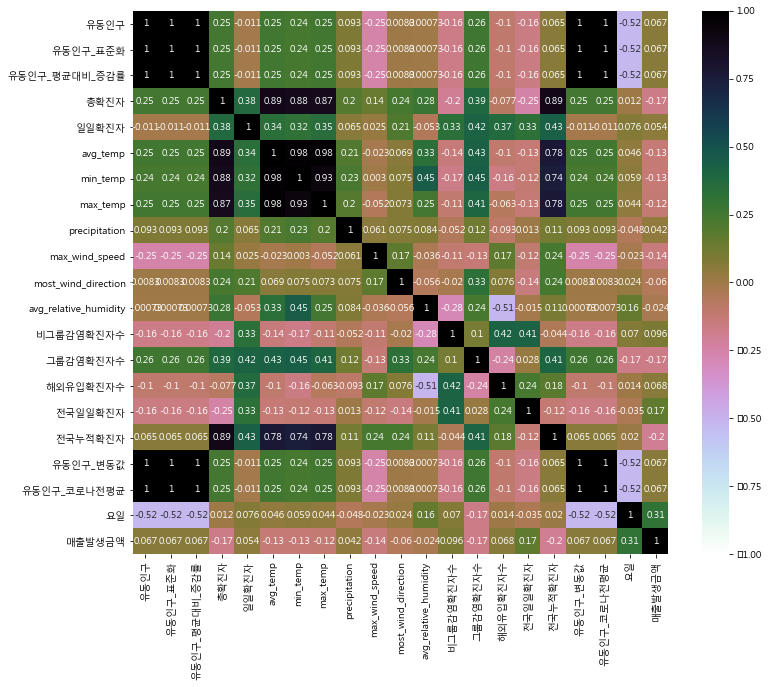

In [169]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal, fuel_maechul, on='년월일',how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [219]:
groupTotal3 = groupTotal.loc[:,['년월일','유동인구','일일확진자','그룹감염확진자수','전국일일확진자','전국누적확진자']]

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


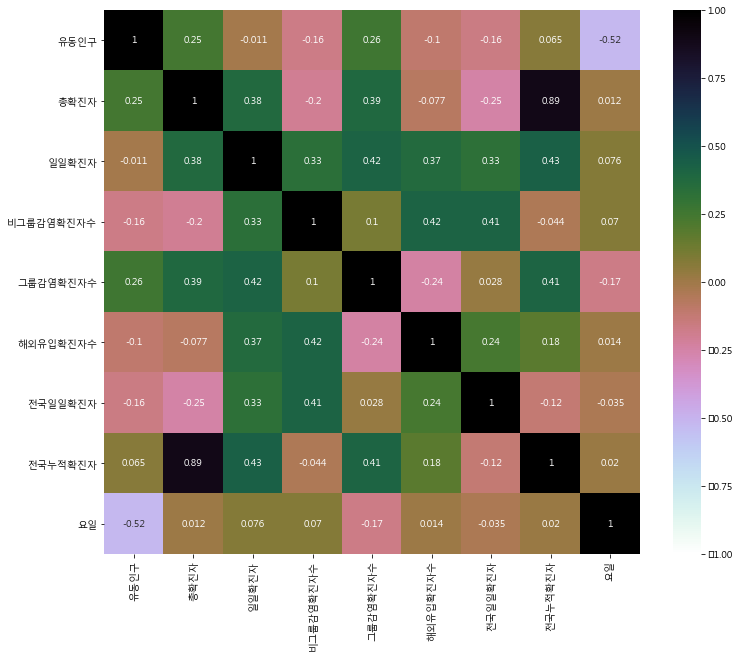

In [182]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( groupTotal3.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [209]:
three_days = seoul['유동인구'].iloc[16:165].reset_index()
three_days.drop(['index'],axis=1,inplace=True)

In [208]:
seven_days = seoul['유동인구'].iloc[12:161].reset_index()
seven_days.drop(['index'],axis=1,inplace=True)

In [210]:
groupTotal3['유동인구_3일전'] = three_days
groupTotal3['유동인구_일주일전'] = seven_days
groupTotal3

,년월일,유동인구,총확진자,일일확진자,비그룹감염확진자수,그룹감염확진자수,해외유입확진자수,전국일일확진자,전국누적확진자,요일,유동인구_3일전,유동인구_일주일전
0,2020-01-20,58756245,0,0,NaN,NaN,NaN,1.0,1,0,61384697,57641672
1,2020-01-21,60130173,0,0,NaN,NaN,NaN,NaN,1,1,57223784,58687051
2,2020-01-22,60989618,0,0,NaN,NaN,NaN,NaN,1,2,47686426,59028326
3,2020-01-23,59576464,0,0,NaN,NaN,1.0,1.0,1,3,58756245,59301598
4,2020-01-24,43898360,0,0,NaN,NaN,NaN,NaN,2,4,60130173,61384697
5,2020-01-25,49147589,0,0,NaN,NaN,NaN,NaN,2,5,60989618,57223784
6,2020-01-26,44222897,0,0,NaN,NaN,NaN,1.0,3,6,59576464,47686426
7,2020-01-27,41025977,1,1,NaN,NaN,NaN,1.0,4,0,43898360,58756245
8,2020-01-28,54362792,1,0,NaN,NaN,NaN,NaN,4,1,49147589,60130173
9,2020-01-29,57504478,1,0,NaN,NaN,NaN,NaN,4,2,44222897,60989618


In [216]:
type(groupTotal3['유동인구_일주일전'][0])

numpy.int64

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


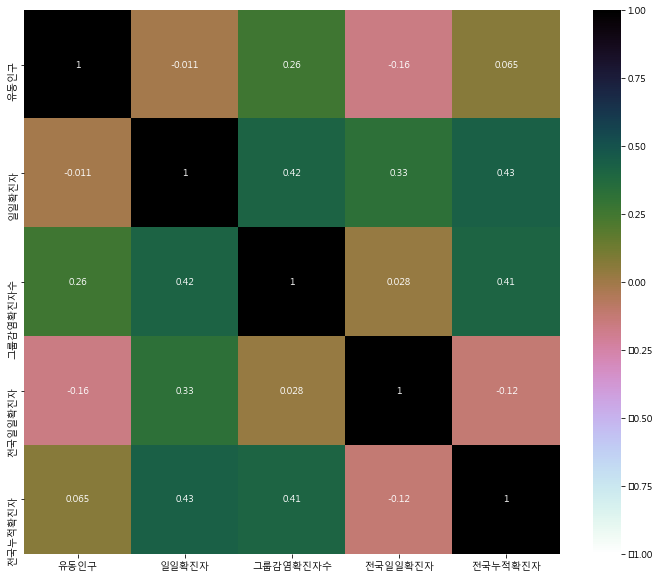

In [220]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( groupTotal3.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

['Malgun Gothic']


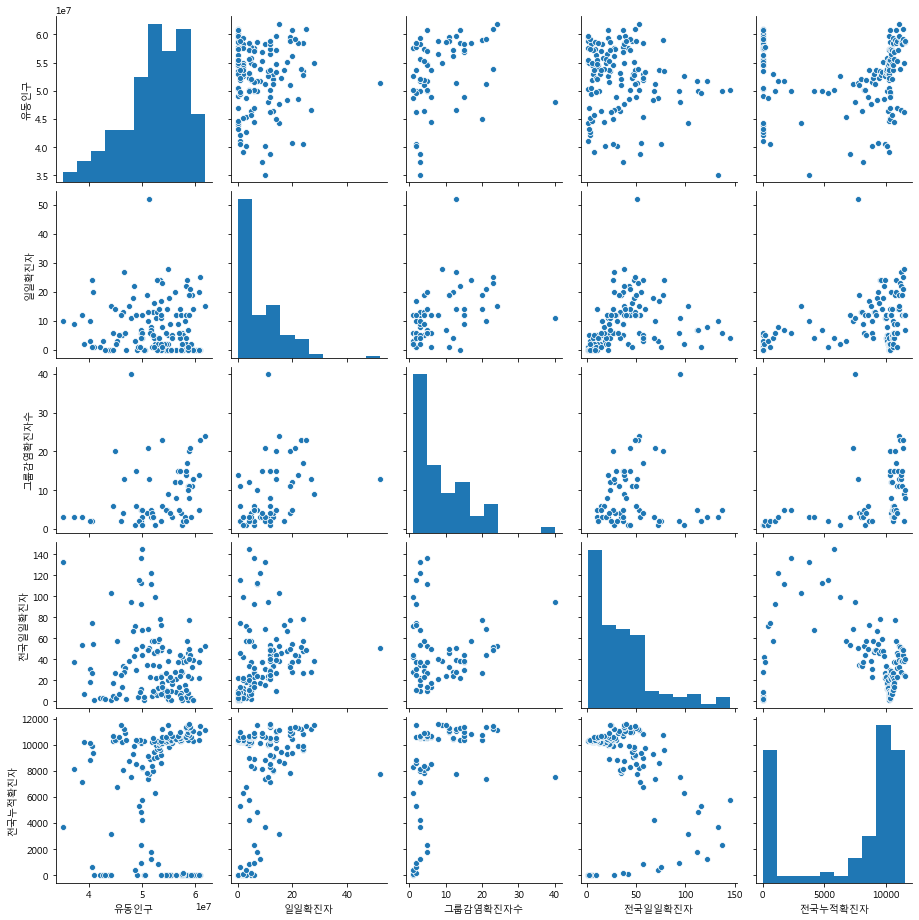

In [221]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

sns.pairplot(groupTotal3)
plt.show()

In [248]:
category_days = dong.groupby(by=['업종명','년월일']).sum()['매출발생금액']
category_days = category_days.reset_index()
category_days = category_days[category_days['업종명']=="주방용식기"].drop(['업종명'],axis=1)
category_days

,년월일,매출발생금액
29761,2020-01-04,2216650.0
29762,2020-01-05,3033800.0
29763,2020-01-07,11132360.0
29764,2020-01-08,2956450.0
29765,2020-01-09,2609150.0
29766,2020-01-10,578950.0
29767,2020-01-11,2274600.0
29768,2020-01-12,7642600.0
29769,2020-01-14,1174360.0
29770,2020-01-15,6030000.0


['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


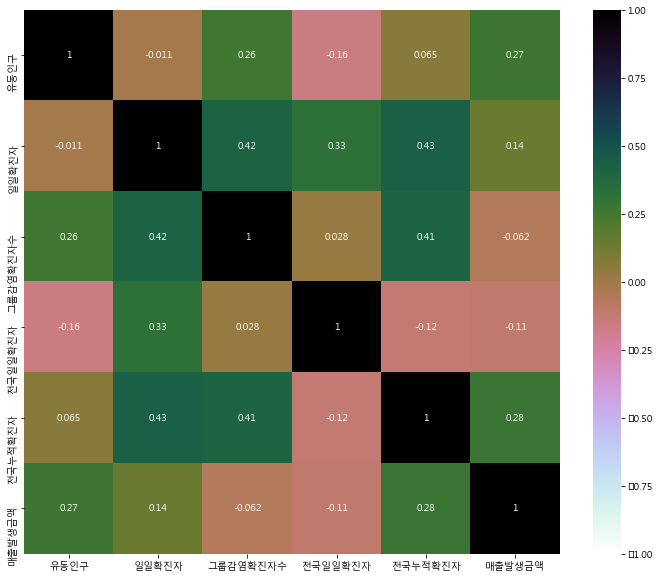

In [245]:

import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal3,category_days,on="년월일",how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [227]:
dong['업종명'].value_counts()

일반한식              65528
서양음식              65499
편 의 점             65160
스넥                65007
미 용 원             64073
슈퍼 마켓             63560
제과점               62666
기타음료식품            62377
약국                62135
주점                61693
중국음식              60113
정 육 점             59613
의원                57859
일식회집              57381
농축수산품             54976
기타레져업             54116
한의원               53926
정장                52974
치과의원              52072
세탁소               51657
화 장 품             50996
당구장               50803
안경                50305
노래방               49147
문구용 품             47122
화   원             46874
스포츠레져용품           43634
기타잡화              43227
자동차정비             42878
주 차 장             42246
사무서비스             41512
동물병원              40409
유아원               38459
애완 동물             38029
사우나               37695
보습학원              36285
주 유 소             36023
피부미용실             35775
목재                34937
기타숙박업             34402
일반 서적             33845
헬스 크럽           

In [249]:
category_days = dong.groupby(by=['업종명','년월일']).sum()['매출발생금액']
category_days = category_days.reset_index()
category_days = category_days[category_days['업종명']=="슈퍼 마켓"].drop(['업종명'],axis=1)
category_days

,년월일,매출발생금액
17916,2020-01-04,2.917026e+09
17917,2020-01-05,3.110397e+09
17918,2020-01-06,2.643687e+09
17919,2020-01-07,2.744422e+09
17920,2020-01-08,2.463361e+09
17921,2020-01-09,3.014903e+09
17922,2020-01-10,2.872994e+09
17923,2020-01-11,3.039510e+09
17924,2020-01-12,3.292022e+09
17925,2020-01-13,3.178178e+09


['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


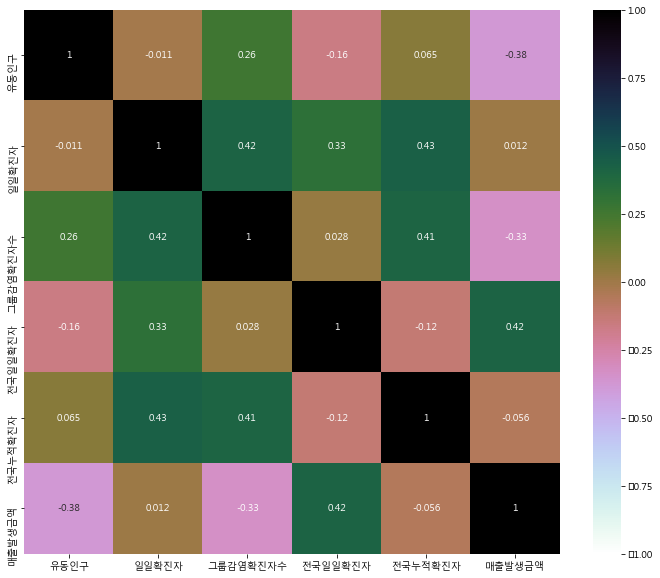

In [250]:

import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal3,category_days,on="년월일",how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [251]:
category_days = dong.groupby(by=['업종명','년월일']).sum()['매출발생금액']
category_days = category_days.reset_index()
category_days = category_days[category_days['업종명']=="주방 용구"].drop(['업종명'],axis=1)
category_days

,년월일,매출발생금액
29608,2020-01-04,16982540.0
29609,2020-01-05,22869590.0
29610,2020-01-06,-857100.0
29611,2020-01-07,13137500.0
29612,2020-01-08,10350140.0
29613,2020-01-09,36504766.0
29614,2020-01-10,23092010.0
29615,2020-01-11,21946000.0
29616,2020-01-12,11516820.0
29617,2020-01-14,22671730.0


['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


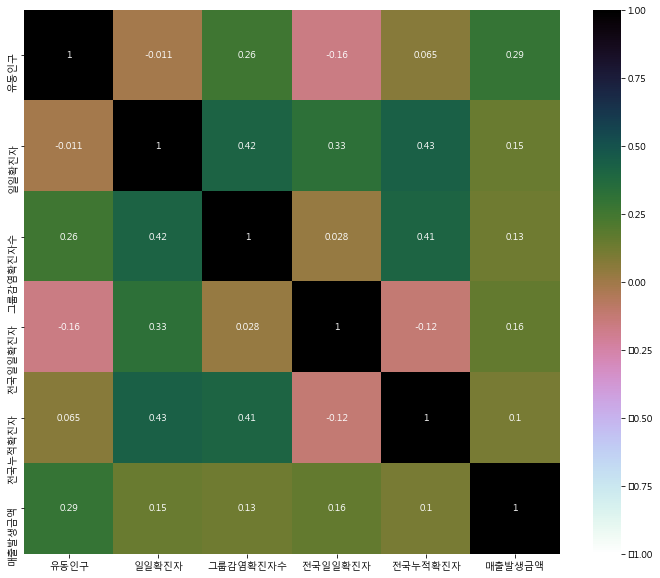

In [252]:

import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal3,category_days,on="년월일",how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [253]:
category_days = dong.groupby(by=['업종명','년월일']).sum()['매출발생금액']
category_days = category_days.reset_index()
category_days = category_days[category_days['업종명']=="대형할인점"].drop(['업종명'],axis=1)
category_days

,년월일,매출발생금액
10677,2020-01-04,4.666503e+08
10678,2020-01-05,2.581879e+08
10679,2020-01-06,1.405436e+09
10680,2020-01-07,1.389494e+09
10681,2020-01-08,7.947982e+08
10682,2020-01-09,7.134025e+08
10683,2020-01-10,9.131325e+08
10684,2020-01-11,5.302823e+08
10685,2020-01-12,2.547930e+08
10686,2020-01-13,3.607311e+08


['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


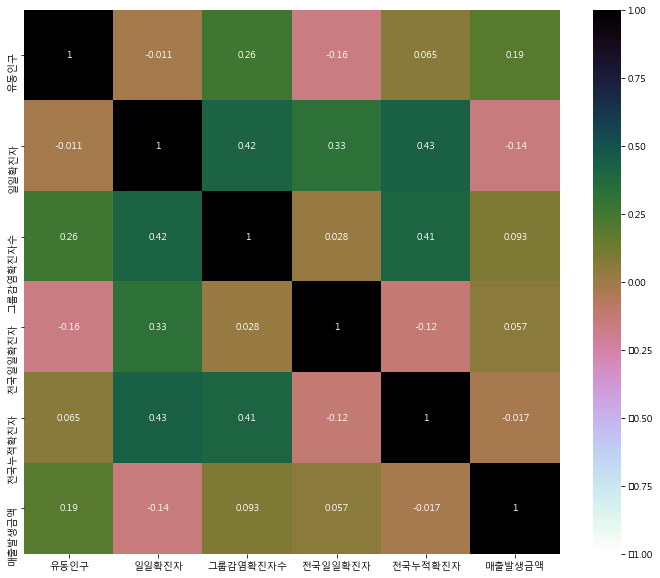

In [254]:

import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal3,category_days,on="년월일",how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [260]:
category_days = dong.groupby(by=['업종명','년월일']).sum()['매출발생금액']
category_days = category_days.reset_index()
category_days = category_days[category_days['업종명'].isin(['화물 운송',"기타 운송"])].drop(['업종명'],axis=1)
category_days

,년월일,매출발생금액
4601,2020-01-22,66000.0
4602,2020-01-23,1000.0
4603,2020-01-29,285400.0
4604,2020-01-30,9000.0
4605,2020-02-01,7000.0
4606,2020-02-02,167800.0
4607,2020-02-05,64900.0
4608,2020-02-06,10000.0
4609,2020-02-14,315700.0
4610,2020-02-15,68200.0


['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


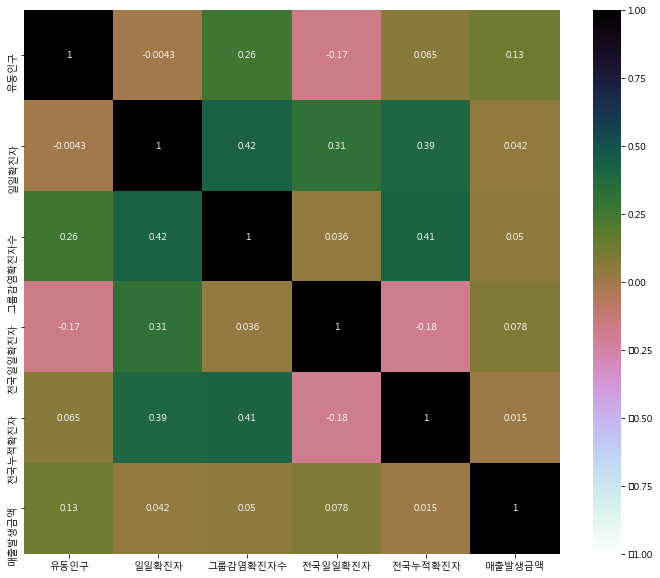

In [261]:

import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal3,category_days,on="년월일",how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [262]:
category_days = dong.groupby(by=['업종명','년월일']).sum()['매출발생금액']
category_days = category_days.reset_index()
category_days = category_days[category_days['업종명']=="주류판매점"].drop(['업종명'],axis=1)
category_days

,년월일,매출발생금액
29456,2020-01-04,10696890.0
29457,2020-01-05,9268305.0
29458,2020-01-07,6843000.0
29459,2020-01-08,12327350.0
29460,2020-01-09,16746700.0
29461,2020-01-10,2847720.0
29462,2020-01-11,29093950.0
29463,2020-01-12,6194080.0
29464,2020-01-14,16889520.0
29465,2020-01-15,33660550.0


['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


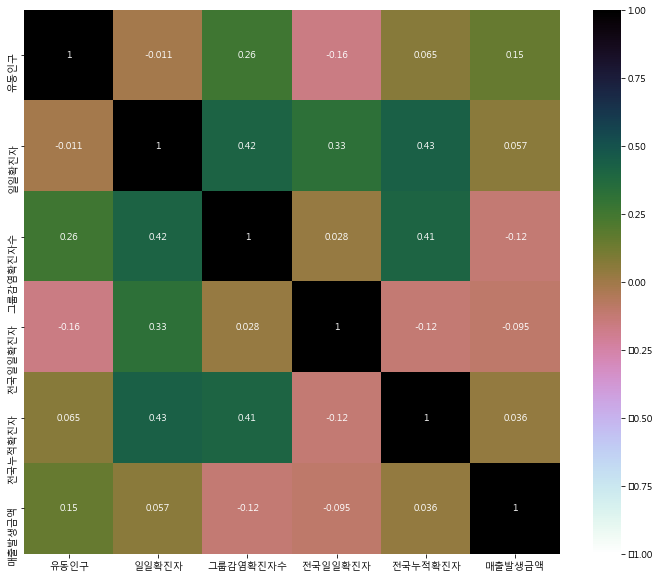

In [263]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( pd.merge(groupTotal3,category_days,on="년월일",how="left").corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()